In [1]:
import os
import csv
import random
import shutil
import zipfile
import numpy as np
from os import getcwd
from shutil import copyfile
import tensorflow as tf
from tensorflow.keras import layers, Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import RMSprop, Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, Dense, MaxPooling2D, Flatten

In [2]:
def get_data(filename):
    with open(filename) as training_file:
      # Your code starts here
        csv_reader = csv.reader(training_file, delimiter=',')
        row_count = 0
        images = []
        labels = []
        for row in csv_reader:
            if row_count == 0:
                pass
                row_count += 1
            else:
                image  = np.array(row[1:785]).astype(float)
                images.append(image.reshape(28, 28))
                
                labels.append(row[0])
                row_count += 1
                
    data = np.array(images)
    label = np.array(labels).astype(float)
      # Your code ends here
    return data, label

path_sign_mnist_train = "archive/sign_mnist_train.csv"
path_sign_mnist_test = "archive/sign_mnist_test.csv"
training_images, training_labels = get_data(path_sign_mnist_train)
testing_images, testing_labels = get_data(path_sign_mnist_test)

# Keep these
print(training_images.shape)
print(training_labels.shape)
print(testing_images.shape)
print(testing_labels.shape)

(27455, 28, 28)
(27455,)
(7172, 28, 28)
(7172,)


In [3]:
training_images = np.expand_dims(training_images, axis=3)
testing_images = np.expand_dims(testing_images, axis=3)

train_datagen = ImageDataGenerator(rescale = 1./255.,
                                   rotation_range = 40,
                                   width_shift_range = 0.2,
                                   height_shift_range = 0.2,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True,
                                  fill_mode='nearest')

test_datagen = ImageDataGenerator( rescale = 1.0/255. )

train_generator = train_datagen.flow(training_images, 
                                     training_labels, 
                                     batch_size=20)

validation_generator = test_datagen.flow(testing_images,
                                         testing_labels,
                                         batch_size=20)
# Keep These
print(training_images.shape)
print(testing_images.shape)
print(training_labels.shape)
print(len(np.unique(training_labels)))
print(len(np.unique(testing_labels)))

(27455, 28, 28, 1)
(7172, 28, 28, 1)
(27455,)
24
24


In [1]:
model = tf.keras.models.Sequential([
    Conv2D(64, 3, activation="relu", input_shape=( 28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, 3, activation="relu"),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(26, activation="softmax")
])

model.summary()

# Compile Model. 
model.compile(optimizer = RMSprop(0.001), 
              loss = 'sparse_categorical_crossentropy', 
              metrics = ['acc'])

# Train the Model
history = model.fit_generator(
    train_generator,
    steps_per_epoch=len(training_images) / 20, 
    epochs=2,
    validation_data = validation_generator,
    validation_steps = len(testing_images) / 20,
    verbose = 1)

model.evaluate(testing_images, testing_labels, verbose=0)

NameError: name 'tf' is not defined

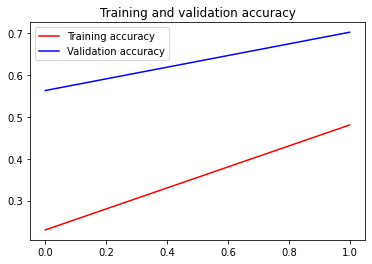

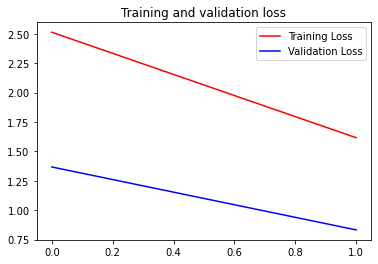

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()